In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import scipy as sp
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from scipy.signal import detrend



## Diagnosing Time Series

# Autoregressive Examples



Series 1: Load series 1 into a data frame

In [2]:
# Load Data

#data_path = '/content/drive/My Drive/Data/AR1.csv'
ar1_dat = pd.read_csv('AR1.csv')

ar1_dat.head
ar1_dat.info()
print(ar1_dat)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    200 non-null    object 
 1   Y       200 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.3+ KB
          DATE           Y
0    01JUN1983  100.041982
1    01JUL1983  100.324358
2    01AUG1983  100.163269
3    01SEP1983  100.238618
4    01OCT1983  100.136555
..         ...         ...
195  01SEP1999  100.067329
196  01OCT1999  100.004667
197  01NOV1999  100.180494
198  01DEC1999  100.187570
199  01JAN2000  100.150937

[200 rows x 2 columns]


Index the series and plot the data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    200 non-null    datetime64[ns]
 1   Y       200 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.2 KB
          DATE           Y
0   1983-06-01  100.041982
1   1983-07-01  100.324358
2   1983-08-01  100.163269
3   1983-09-01  100.238618
4   1983-10-01  100.136555
..         ...         ...
195 1999-09-01  100.067329
196 1999-10-01  100.004667
197 1999-11-01  100.180494
198 1999-12-01  100.187570
199 2000-01-01  100.150937

[200 rows x 2 columns]


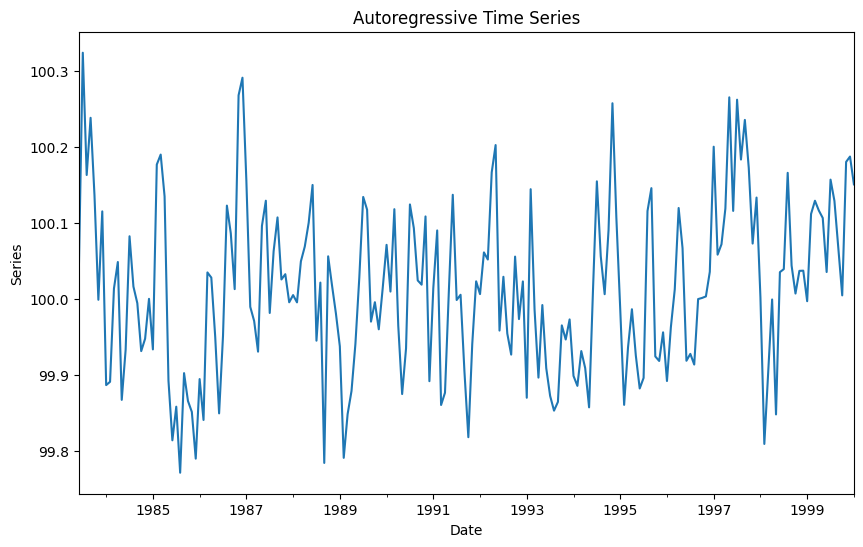

In [ ]:

# Convert date column to a date class variable
ar1_dat['DATE'] = pd.to_datetime(ar1_dat['DATE'], format="%d%b%Y")

ar1_dat.info()
print(ar1_dat)

# Create indexed series
ar1_ts = pd.Series(ar1_dat['Y'].values, index=ar1_dat['DATE'])

#Plot the series
plt.figure(figsize=(10, 6))
ar1_ts.plot()
plt.title("Autoregressive Time Series")
plt.xlabel("Date")
plt.ylabel("Series")
plt.show()



## Plot ACF and PACF

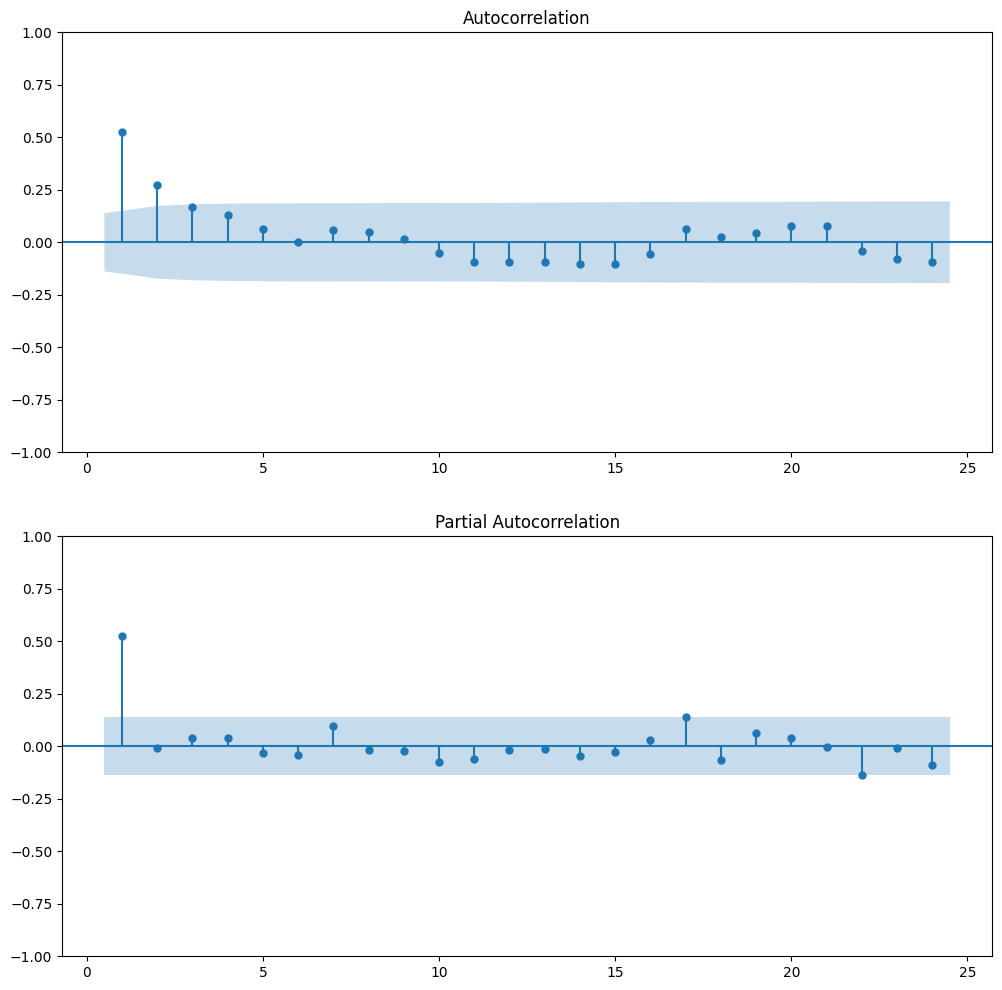

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
plot_acf(ar1_ts, ax=ax1, zero=False)
plot_pacf(ar1_ts, ax=ax2, zero=False)
plt.show()


Test for Stationarity

In [ ]:
#Dickey Fuller (single mean version)
adfuller(ar1_ts, regression='c')

(-7.727241554642183,
 1.1503064692938013e-11,
 0,
 199,
 {'1%': -3.4636447617687436,
  '5%': -2.8761761179270766,
  '10%': -2.57457158581854},
 -350.18390844343)

Fit an ARIMA(1,0,0) model to the data and examine the residuals

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  200
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 188.076
Date:                Tue, 03 Oct 2023   AIC                           -370.152
Time:                        15:36:51   BIC                           -360.257
Sample:                    06-01-1983   HQIC                          -366.147
                         - 01-01-2000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        100.0147      0.014   6978.575      0.000      99.987     100.043
ar.L1          0.5287      0.067      7.869      0.000       0.397       0.660
sigma2         0.0089      0.001      9.906      0.0

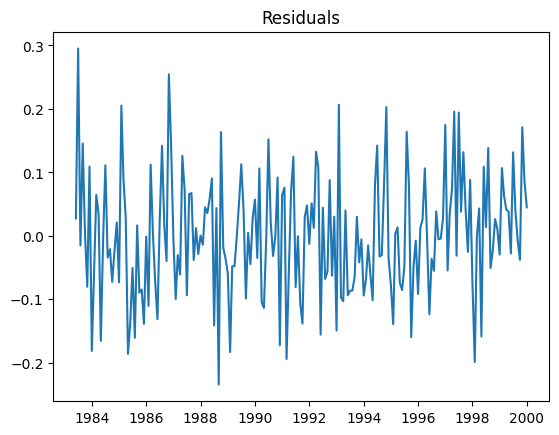

In [ ]:
fit_AR1 = ARIMA(ar1_ts, order=(1,0,0)).fit()

# Summary of the ARIMA model
print(fit_AR1.summary())

# Examine residuals from the model
residuals = fit_AR1.resid
plt.plot(residuals)
plt.title('Residuals')
plt.show()

Check the residuals for autocorrelation using the ACF and PACF

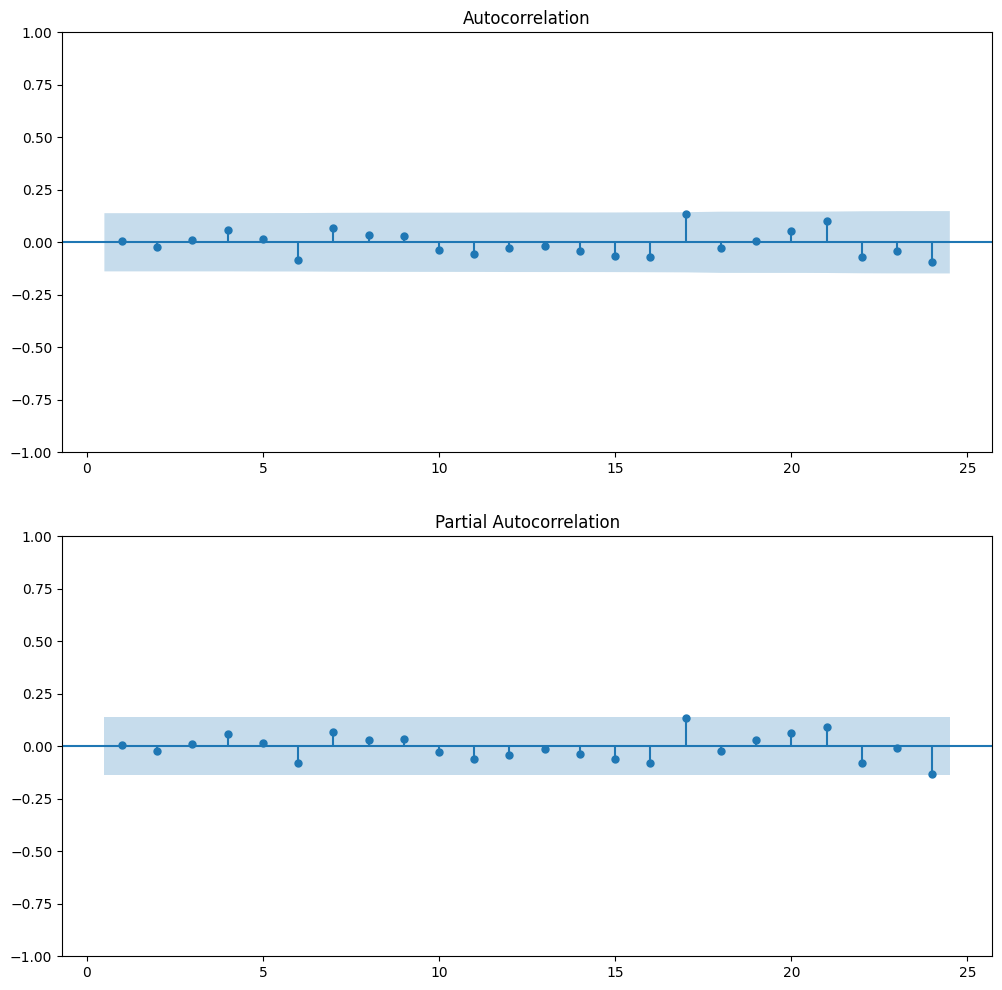

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
plot_acf(residuals, ax=ax1, zero=False)
plot_pacf(residuals, ax=ax2, zero=False)
plt.show()


Test the residuals for white noise

In [ ]:
#execute the Ljung Box test on the kW_Gen series using 10 lags

sm.stats.acorr_ljungbox(residuals, lags=[10], return_df=True)


,lb_stat,lb_pvalue
10,3.980321,0.94823


Series 2: Load series 2 into a data frame

In [ ]:
# Load Data

data_path = '/content/drive/My Drive/Data/AR2.csv'
ar2_dat = pd.read_csv(data_path)

ar2_dat.head
ar2_dat.info()
print(ar2_dat)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    200 non-null    object 
 1   Y       200 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB
          DATE           Y
0    01JUN1983   99.752610
1    01JUL1983  100.042016
2    01AUG1983   99.919647
3    01SEP1983  100.105049
4    01OCT1983  100.032308
..         ...         ...
195  01SEP1999  100.268095
196  01OCT1999  100.214019
197  01NOV1999  100.386534
198  01DEC1999  100.375400
199  01JAN2000  100.379595

[200 rows x 2 columns]


Index the series and plot the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    200 non-null    datetime64[ns]
 1   Y       200 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.2 KB
          DATE           Y
0   1983-06-01   99.752610
1   1983-07-01  100.042016
2   1983-08-01   99.919647
3   1983-09-01  100.105049
4   1983-10-01  100.032308
..         ...         ...
195 1999-09-01  100.268095
196 1999-10-01  100.214019
197 1999-11-01  100.386534
198 1999-12-01  100.375400
199 2000-01-01  100.379595

[200 rows x 2 columns]


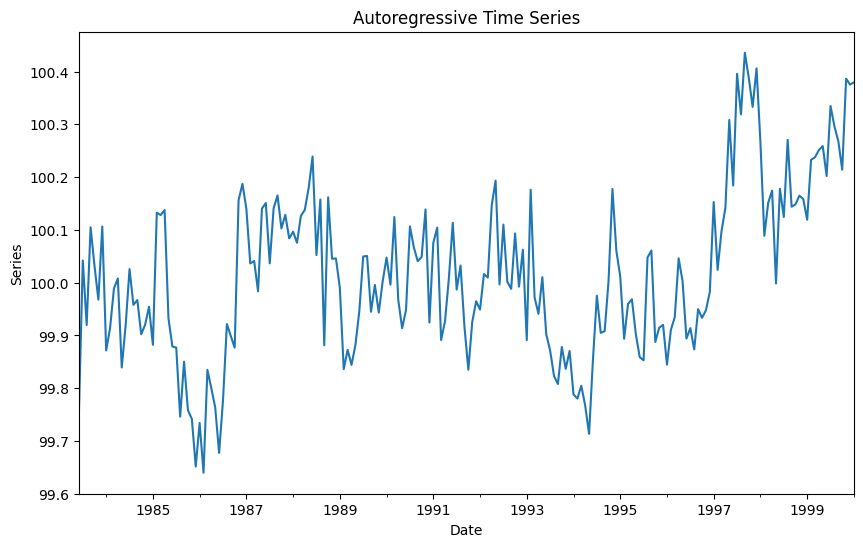

In [ ]:
# Convert date column to a date class variable
ar2_dat['DATE'] = pd.to_datetime(ar2_dat['DATE'], format="%d%b%Y")

ar2_dat.info()
print(ar2_dat)

# Create indexed series
ar2_ts = pd.Series(ar2_dat['Y'].values, index=ar2_dat['DATE'])

#Plot the series
plt.figure(figsize=(10, 6))
ar2_ts.plot()
plt.title("Autoregressive Time Series")
plt.xlabel("Date")
plt.ylabel("Series")
plt.show()


Plot ACF and PACF

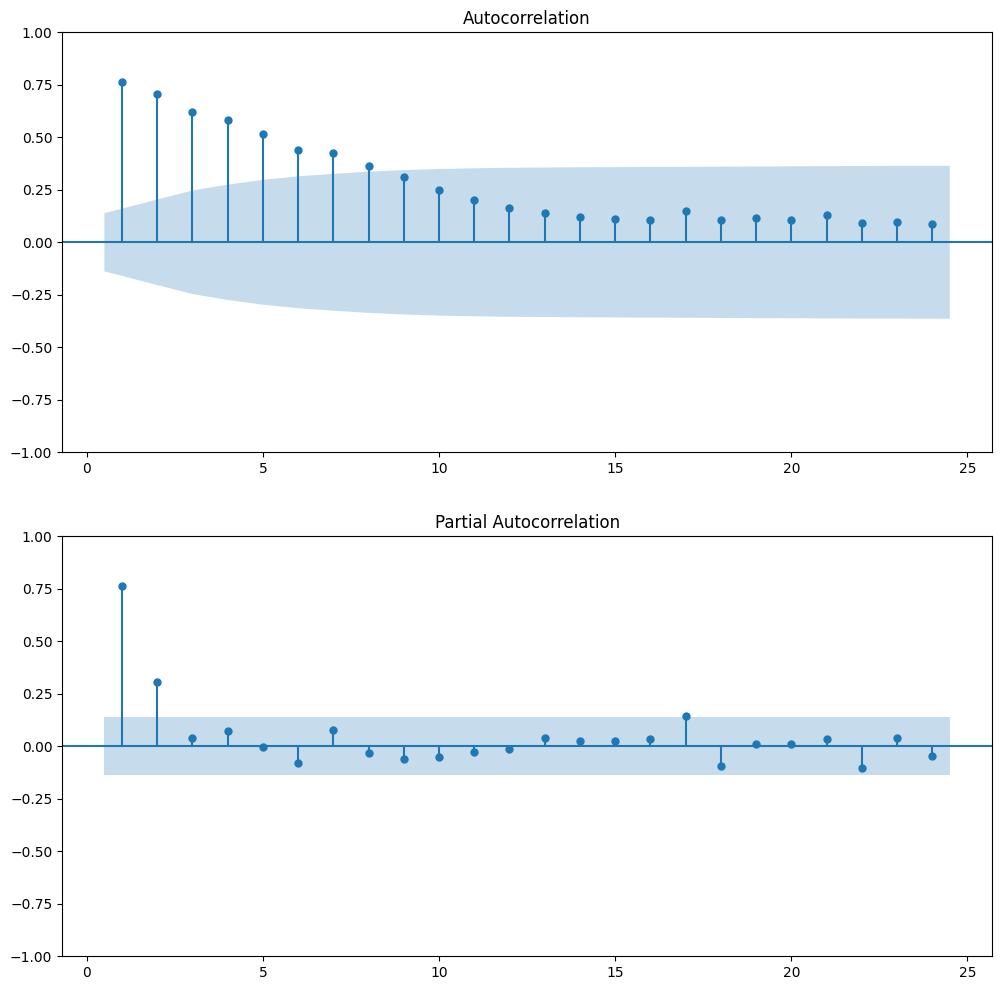

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
plot_acf(ar2_ts, ax=ax1, zero=False)
plot_pacf(ar2_ts, ax=ax2, zero=False)
plt.show()


Test for Stationarity

In [ ]:
# ADF Test

Fit an ARIMA(p, d, q) model to the data and examine the residuals

In [ ]:
# Fit ARIMA

Check the residuals for autocorrelation using the ACF and PACF

In [ ]:
# Plot ACF and PACF

Test the residuals for white noise

In [ ]:
# Ljung Box Test for Residuals

# Moving Average Examples

Series 3: Load series into a data frame

In [ ]:
# Load Data

data_path = '/content/drive/My Drive/Data/MA1.csv'
MA1_dat = pd.read_csv(data_path)

MA1_dat.head
MA1_dat.info()
print(MA1_dat)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    200 non-null    object 
 1   Y       200 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB
          DATE           Y
0    01JUN1983  100.076986
1    01JUL1983  100.242422
2    01AUG1983   99.789153
3    01SEP1983  100.159464
4    01OCT1983   99.908990
..         ...         ...
195  01SEP1999   99.968990
196  01OCT1999   99.970346
197  01NOV1999  100.199132
198  01DEC1999   99.972658
199  01JAN2000   99.990831

[200 rows x 2 columns]


Index the series and plot the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    200 non-null    datetime64[ns]
 1   Y       200 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.2 KB
          DATE           Y
0   1983-06-01  100.076986
1   1983-07-01  100.242422
2   1983-08-01   99.789153
3   1983-09-01  100.159464
4   1983-10-01   99.908990
..         ...         ...
195 1999-09-01   99.968990
196 1999-10-01   99.970346
197 1999-11-01  100.199132
198 1999-12-01   99.972658
199 2000-01-01   99.990831

[200 rows x 2 columns]


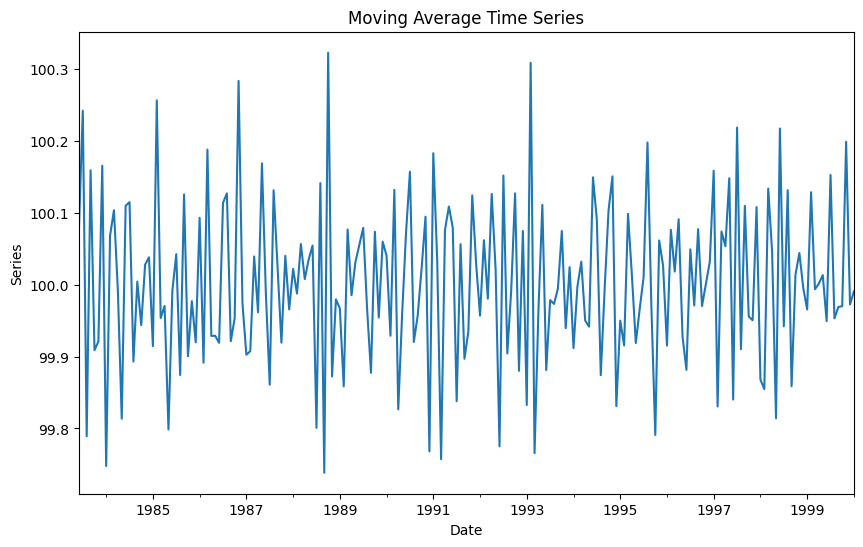

In [ ]:
# Convert date column to a date class variable
MA1_dat['DATE'] = pd.to_datetime(MA1_dat['DATE'], format="%d%b%Y")

MA1_dat.info()
print(MA1_dat)

# Create indexed series
MA1_ts = pd.Series(MA1_dat['Y'].values, index=MA1_dat['DATE'])

#Plot the series
plt.figure(figsize=(10, 6))
MA1_ts.plot()
plt.title("Moving Average Time Series")
plt.xlabel("Date")
plt.ylabel("Series")
plt.show()


Plot the ACF and PACF

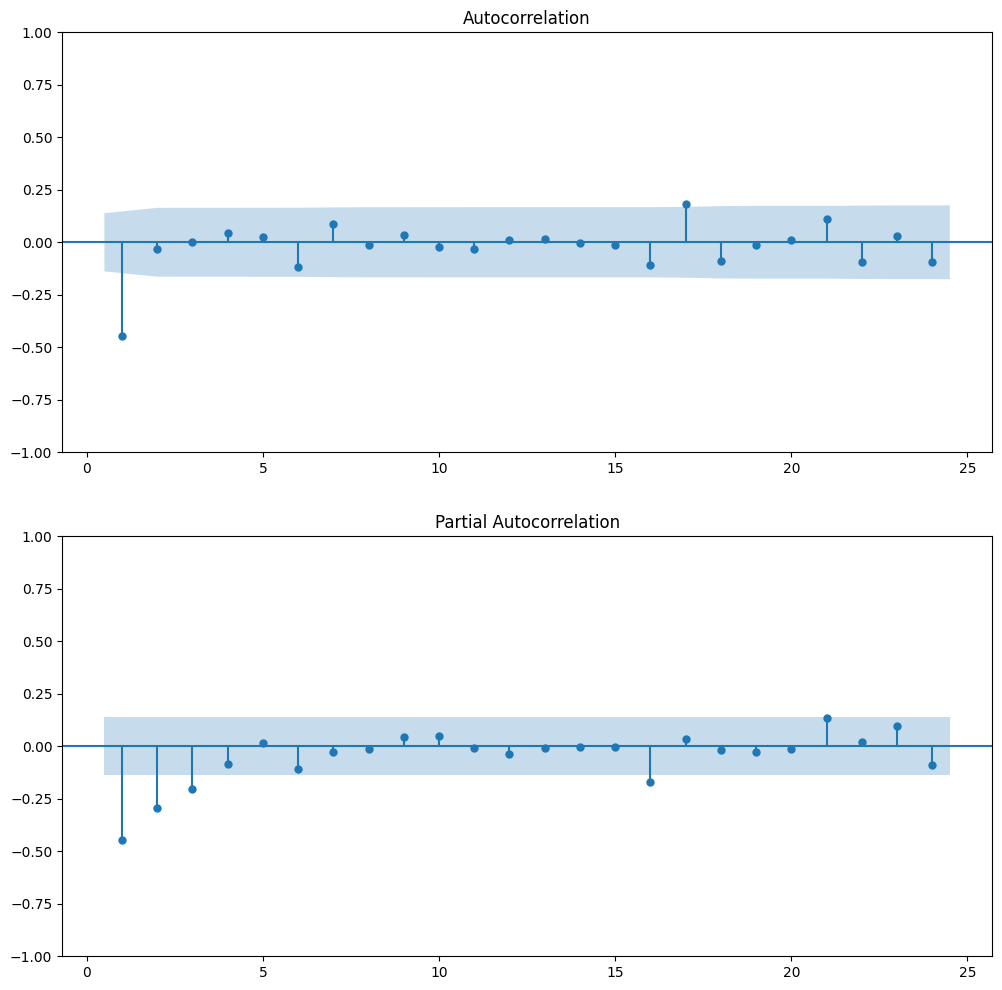

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
plot_acf(MA1_ts, ax=ax1, zero=False)
plot_pacf(MA1_ts, ax=ax2, zero=False)
plt.show()


Test for Stationarity

In [ ]:
# ADF test

Fit an ARIMA(p,d,q) model to the data and examine the residuals

In [ ]:
# Fit ARIMA

Check the residuals for white noise using the ACF and PACF

In [ ]:
# Plot ACF and PACF

Test the residuals for white noise

In [ ]:
# Ljung Box Test for Residuals

Series 4: Load series into a data frame

In [ ]:
# Load Data

data_path = '/content/drive/My Drive/Data/MA2.csv'
MA2_dat = pd.read_csv(data_path)

MA2_dat.head
MA2_dat.info()
print(MA2_dat)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    200 non-null    object 
 1   Y       200 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.2+ KB
          DATE           Y
0    01JUN1983  100.086368
1    01JUL1983  100.243083
2    01AUG1983   99.790697
3    01SEP1983  100.066579
4    01OCT1983   99.932460
..         ...         ...
195  01SEP1999   99.931707
196  01OCT1999   99.958893
197  01NOV1999  100.198598
198  01DEC1999  100.001146
199  01JAN2000   99.945450

[200 rows x 2 columns]


Index the series and plot the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    200 non-null    datetime64[ns]
 1   Y       200 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.2 KB
          DATE           Y
0   1983-06-01  100.086368
1   1983-07-01  100.243083
2   1983-08-01   99.790697
3   1983-09-01  100.066579
4   1983-10-01   99.932460
..         ...         ...
195 1999-09-01   99.931707
196 1999-10-01   99.958893
197 1999-11-01  100.198598
198 1999-12-01  100.001146
199 2000-01-01   99.945450

[200 rows x 2 columns]


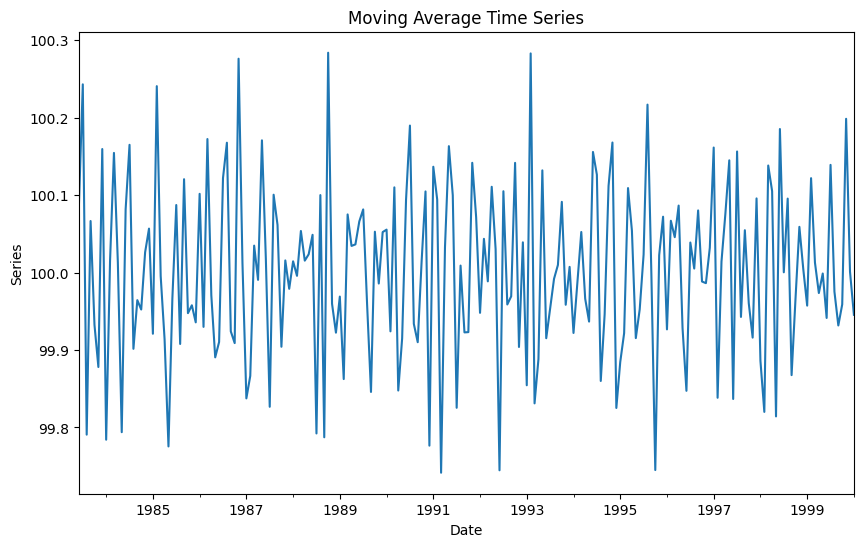

In [ ]:
# Convert date column to a date class variable
MA2_dat['DATE'] = pd.to_datetime(MA2_dat['DATE'], format="%d%b%Y")

MA2_dat.info()
print(MA2_dat)

# Create indexed series
MA2_ts = pd.Series(MA2_dat['Y'].values, index=MA2_dat['DATE'])

#Plot the series
plt.figure(figsize=(10, 6))
MA2_ts.plot()
plt.title("Moving Average Time Series")
plt.xlabel("Date")
plt.ylabel("Series")
plt.show()


Plot ACF and PACF

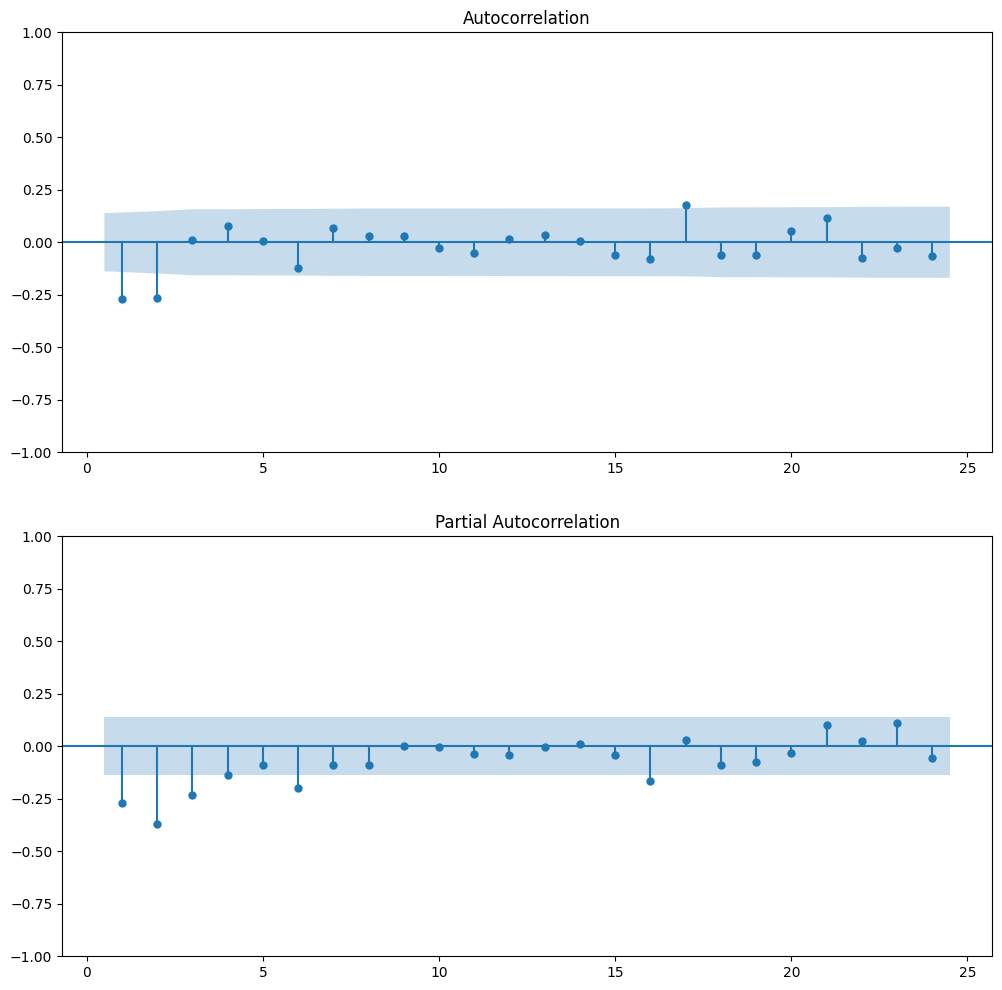

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
plot_acf(MA2_ts, ax=ax1, zero=False)
plot_pacf(MA2_ts, ax=ax2, zero=False)
plt.show()

Test for Stationarity

In [ ]:
# ADF Test

Fit an ARIMA(p, d, q) model to the data and examine the residuals

In [ ]:
# Fit ARIMA

Check the residuals for autocorrelation using the ACF and PACF

In [ ]:
# Plot ACF and PACF

Test the residuals for white noise

In [ ]:
# Ljung Box Test for Residuals